In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# baseline model with dropout on the cifar10 dataset
import sys
import tensorflow
from tensorflow import keras
from matplotlib import pyplot
from keras.datasets import cifar10
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Input
from keras.layers import Activation


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

**VGG to look like ResNet**

In [3]:
def define_model_Skip():
  input_shape=(32, 32, 3)
  X_input = keras.layers.Input(input_shape)
  x = keras.layers.ZeroPadding2D((3, 3))(X_input)

  x_shortcut=X_input

  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',strides=(2,2), padding='same')(x)
  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2, 2))(x) 

  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2, 2))(x)

  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x_shortcut=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2,2))(x_shortcut)

  x_shortcut=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid',strides=(3, 3))(x_shortcut)
  #print(tf.shape(x))
  #print(tf.shape(x_shortcut))

  x= Add()([x, x_shortcut])

  x=GlobalAveragePooling2D()(x)
  x=Flatten()(x)
  x=Dense(10, activation='softmax',kernel_initializer='he_uniform')(x)
  model = Model(inputs=X_input, outputs=x)
  return model

In [4]:
import matplotlib.pyplot as plt

def summarize_diagnostics(history):
	fig, (ax1, ax2) = plt.subplots(2)
	# plot loss
	ax1.set_title('Cross Entropy Loss')
	ax1.plot(history.history['loss'], color='blue', label='train')
	ax1.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	ax2.set_title('Classification Accuracy')
	ax2.plot(history.history['accuracy'], color='blue', label='train')
	ax2.plot(history.history['val_accuracy'], color='orange', label='test')
	fig.tight_layout()
	# save plot to file
	filename = 'Enter filename'
	#plt.savefig(filename + '_plot.png')
	plt.show()

> 56.920 %


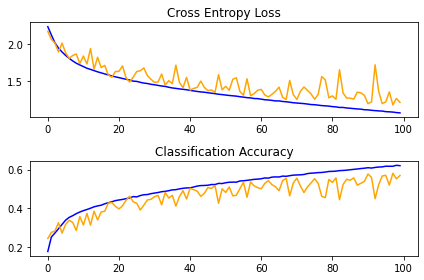

In [5]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_Skip()
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
# Evaluate Model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0),"%")
# learning curves
summarize_diagnostics(history)

**Deeper Network**

In [9]:
def define_model_Skip_Deeper():
  input_shape=(32, 32, 3)
  X_input = keras.layers.Input(input_shape)
  x = keras.layers.ZeroPadding2D((3, 3))(X_input)

  x_shortcut=X_input

  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',strides=(2,2), padding='same')(x)
  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2, 2))(x) 

  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2, 2))(x)

  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x=Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2,2))(x)

  x=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
  x=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x) 
  x_shortcut=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',strides=(2,2))(x_shortcut)

  x_shortcut=Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid',strides=(5, 5))(x_shortcut)
  #print(tf.shape(x))
  #print(tf.shape(x_shortcut))

  x= Add()([x, x_shortcut])

  x=GlobalAveragePooling2D()(x)
  x=Flatten()(x)
  x=Dense(10, activation='softmax',kernel_initializer='he_uniform')(x)
  model = Model(inputs=X_input, outputs=x)
  return model

> 51.290 %


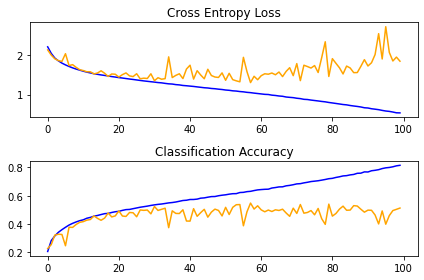

In [13]:
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model_Skip_Deeper()
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
# Evaluate Model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0),"%")
# learning curves
summarize_diagnostics(history)